In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from tweepy import OAuthHandler
from timeit import default_timer as timer
import spacy
import re

pd.options.display.max_rows = 100

# Table of Contents 

- [1. Gathering Data](#gather)
    - [1.1 Manually](#downloadman)
    - [1.2 Programmatically](#downloadprog)
    - [1.3 Over API](#downloadapi)
- [2. Assesing Data](#assess)
    - [2.1 Twitter Archive Enchanced (CSV)](#archive)
    - [2.2 Image Prediction File (TSV)](#predict)
    - [2.3 Twitter JSON](#tweet)
- [3. Cleaning Data Part 1](#clean)
- [4. Reassesing Data](#reass)
- [5. Cleaning Data Part 2](#clean2)
- [6. Analysis](#analyze)

### Submission 2: Fixes
- only dropping retweets! I missread the task and dropped replies too. (fixed in [1. Problem](#1prob))
- only extracted one doglingo word but some tweets had more words, fixed my function which include mutiple entries (fixed in [4. Problem](#4prob))
- Forgot the title label in the breed barplot: added the title (fixed in [Analysis_plot](#anabar))

<a id="gather" ></a>
# 1. Gathering Data

#### 1. download file manually: download twitter-archive-echanced.csv and import the data in pandas
#### 2. download file programmatically: Request Image Predictions file as tsv file
#### 3. API Twitter Data

<a id="downloadman" ></a>
### 1.1 Step Manually

In [2]:
df_archive = pd.read_csv("./twitter-archive-enhanced.csv")

In [3]:
# displaying the first 5 rows of the dataframe
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id="downloadprog" ></a>
### 1.2 Step: Programmatically

In [4]:
# define url and request the necesary data. Define filename with last part of the url 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
filename = url.split("/")[-1]
response

<Response [200]>

In [5]:
# Response [200] -> Sucess
# create a file with the requested content of the cloud url
with open(filename, mode="wb") as file:
    file.write(response.content)

In [6]:
df_predict = pd.read_csv(filename, sep="\t")

In [7]:
# In case if you have more than one url. Creating a folder and store the url content in it
url_list = ["https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"]
folder_name = "WeRateDog_Data"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
for url in url_list:
    response = requests.get(url)
    file_name = url.split("/")[-1]
    with open(os.path.join(folder_name, file_name), mode="wb") as file:
        file.write(response.content)
    

<a id="downloadapi" ></a>
### 1.3 Step: Data via Tweepy

In [ ]:
### Set Consumer Key/Access Key for Authentification - Using the given API Tweepy code of the udacity resource cause
# i had Problems to setting an account for twitter.

consumer_key = 'hide'
consumer_secret = 'hide'
access_token = 'hide'
access_secret = 'hide'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_archive.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
# reading in the file line by line and save in a list of dictionairies
file = open("tweet_json.txt", 'r')
tweet_dic_list = []
for line in file.readlines():
    tweet_dic = json.loads(line)
    tweet_dic_list.append(tweet_dic)

file.close()

In [9]:
# display dictionairy keys to look for interesting data
tweet_dic.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [10]:
# display one whole dictionairy with all data of the first tweet in the dictionary list
tweet_dic_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [11]:
# getting the whole data of the User "WeRateDogs"
tweet_dic['user']

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': 'links and things ➜',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/hADNnRWmP3',
 'entities': {'url': {'urls': [{'url': 'https://t.co/hADNnRWmP3',
     'expanded_url': 'http://campsite.bio/weratedogs',
     'display_url': 'campsite.bio/weratedogs',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 9011642,
 'friends_count': 17,
 'listed_count': 6571,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 145216,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 13716,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'htt

In [12]:
# Save only the the three columns with id, favourite_count and retweet_count as DataFrame
df_tweet = pd.DataFrame(tweet_dic_list, columns = ['id_str', 'favorite_count', 'retweet_count'])

In [13]:
# displaying the first 5 rows of the dataframe
df_tweet.head()

,id_str,favorite_count,retweet_count
0,892420643555336193,34867,7316
1,892177421306343426,30200,5466
2,891815181378084864,22732,3607
3,891689557279858688,38141,7505
4,891327558926688256,36410,8060


<a id="assess" ></a>
# 2. Assessing Data

<a id="archive" ></a>
### 2.1Twitter Archive Enchanced

In [14]:
## Assess visually, displaying the first 10 rows of the dataframe
df_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
# Get important information of the dataframe like all column names, how many entries per column and Dtype
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# displaying general statistical values of the dataframe
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# Count the values of unique items in the source column
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
# count the possible combinations and unique values in the 'doggo',"floofer", "pupper", "puppo" columns
df_archive[['doggo',"floofer", "pupper", "puppo"]].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [19]:
# How many entries aren't "None   None     None    None"
df_archive[['doggo',"floofer", "pupper", "puppo"]].value_counts()[1:].sum()

380

In [20]:
df_archive[df_archive['in_reply_to_user_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [21]:
# Display the unique values of the rating numerator, cause of the high range in min & max of the column
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [22]:
df_archive[df_archive.rating_numerator > 100]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [23]:
# display some random sample of the dataframe to get a better insight of the frame
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1998,672538107540070400,NaN,NaN,2015-12-03 22:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672538107...,7,10,Darby,None,None,None,None
137,866094527597207552,NaN,NaN,2017-05-21 00:53:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper before and afte...,8.378202e+17,4.196984e+09,2017-03-04 00:21:08 +0000,https://twitter.com/dog_rates/status/837820167...,12,10,None,None,None,pupper,None
1415,698703483621523456,NaN,NaN,2016-02-14 03:01:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He has no respect for POULTRY p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698703483...,7,10,Rusty,None,None,None,None
239,846874817362120707,NaN,NaN,2017-03-29 00:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Tuck. As you can see, he's rather h*ck...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/846874817...,13,10,Tuck,None,None,None,None
422,821813639212650496,NaN,NaN,2017-01-18 20:16:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Hercules. He can have what...,7.806013e+17,4.196984e+09,2016-09-27 02:53:48 +0000,https://twitter.com/dog_rates/status/780601303...,12,10,Hercules,None,None,None,None
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,None,None,pupper,None
1416,698635131305795584,NaN,NaN,2016-02-13 22:29:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131...,12,10,None,None,None,None,None
971,750101899009982464,NaN,NaN,2016-07-04 23:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lilah. She agreed on one quick pic. Now s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750101899...,11,10,Lilah,None,None,None,None
1395,699801817392291840,NaN,NaN,2016-02-17 03:45:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He began to tear up when his b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699801817...,11,10,Cooper,None,None,pupper,None
2179,669006782128353280,NaN,NaN,2015-11-24 04:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He is 100% ready for the sport...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669006782...,12,10,Tucker,None,None,None,None


In [24]:
# display if there are any duplicated tweet_id s
df_archive.tweet_id.duplicated().sum()

0

In [25]:
df_archive.rating_numerator.isnull().sum()

0

In [26]:
# Looking up the names column and counting the values of unique items
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Nico          1
Combo         1
Clifford      1
Reagan        1
Berkeley      1
Name: name, Length: 957, dtype: int64

In [27]:
# There are many "a" and "the" in the names column. Save the names in a list. Expecting that all names usually starts with
# a capital letter. Saving also the list of all wrong names in a list

name_list = df_archive.name.value_counts()
wrong_names = name_list[name_list.index.str.islower()]
wrong_names_list = wrong_names.index
wrong_names.sum()

109

In [28]:
# displaying all dog names with a lowercase letter at the beginning
wrong_names_list

Index(['a', 'the', 'an', 'very', 'quite', 'just', 'one', 'mad', 'not',
       'getting', 'actually', 'infuriating', 'unacceptable', 'officially',
       'light', 'old', 'my', 'life', 'his', 'incredibly', 'all', 'space', 'by',
       'this', 'such'],
      dtype='object')

In [29]:
# displaying all dog names which aren't the "wrong_names_list" and counting them
df_archive[~df_archive.name.isin(wrong_names_list)].name.value_counts()

None       745
Charlie     12
Cooper      11
Oliver      11
Lucy        11
          ... 
Reagan       1
Tommy        1
Carper       1
Chevy        1
Bradley      1
Name: name, Length: 932, dtype: int64

<a id="predict" ></a>
### 2.2 Image Prediction File

In [30]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<a id="tweet" ></a>
### 2.3 Twitter Tweet JSON

In [33]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2331 non-null   object
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [34]:
df_tweet.describe()

,favorite_count,retweet_count
count,2331.000000,2331.000000
mean,7280.710425,2573.748177
std,11310.028902,4353.408491
min,0.000000,1.000000
25%,1260.000000,522.500000
50%,3153.000000,1200.000000
75%,8896.000000,2979.500000
max,149781.000000,73837.000000


In [35]:
df_tweet.isnull().sum()

id_str            0
favorite_count    0
retweet_count     0
dtype: int64

<a id="assess" ></a>
# First Assessing

#### Quality Issues

- column names aren't descriptive enough
    - df_archive: 
        - "source" to "platform_source",
        - "text" to "tweet_text",     
        - "name" to "dog_name"

    - df_pedict: 
        - "img_num" to "number_of_images"
   
    - df_tweet: 
        - "id_str" to "tweet_id"
        
        
- some datatypes needed to be changed
    - df_archive: 
        - change timestamp to datetime object. But first delete the last "+0000" of the timestamp entries, this isn't a necesary information
        - change tweet_id to string (no aggregations needed)
        - AFTER changing entries of platform_scource -> Categorial Datatype
        - AFTER melting or combine "doggo, floofer, pupper, puppo" -> Categorical Datatype
        - in_reply_status_id and in_reply_to_user_id have, retweeted_status_id and  retweeted_status_user_id are floats, change it to string (Dropping the columns anyways, NOT NEEDED)
        - change type of retweeted_status_timestamp (string object) to datetime object (Dropping the columns anyways, NOT NEEDED)   
        
    - df_predict:
        - change tweet_id to string (no aggregations needed)
        
        
- not understandable entries
    - df_archvce:
        - "source" has entries like: "<a "http://twitter.com/download/iphone" "nofollow">Twitter for iPhone</a>". Only the last part is needed (e.g. instead of the whole html format, use "Twitter for iPhone")
        
        
- Mistakes in the df_archive name column:
    - wrong classifcation in the names list. Dog without names are stored as a "None" (dtype: string), instead of the ClassObject None 
    - 109 wrong names like articels or adjectives. Cause of the quantity it's not easy to handle this issue. Manually changing will take too long. A "better" name extracting algorithm with e.g. spaCy or nltk should be better. The problem is that the creator of the archive_enchanced probably used "Here is" and "This is" as an indicator of an incoming dog name -> doesn't work anytime

- "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" only have 181 entries and don't provide some much information for the Analyzing. Furthermore the task is to analyze only the data original tweets with images. So drop all rows with indicates that the listed tweet is a retweet. After that drop the columns.

#### Tidiness Issues



- doggo, floofer, pupper, puppo are one variable, only one column needed to describe the "dog_stage". Some Tweets contains two Doggolingo words. Only use the first one in the tweet (The 2nd part is more a quality issue)

- concat/merge the Dataframes df_archive, df_tweet and df_predict to one main dataframe

<a id="clean" ></a>
# 3. Cleaning Data Part 1

In [36]:
# making copies of the original dataframes
df_archive_clean = df_archive.copy()
df_tweet_clean = df_tweet.copy()
df_predict_clean = df_predict.copy()

In [37]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id="1prob" ></a>
## First Problem

filtering retweets or replies and delete them

##### Define
- Drop all rows where tweets are retweets
- filter the dataframe df_archive where retweeted_status_id is NaN and save it as a new frame. 

### FIX:
Only dropping retweets!

##### Coding

In [38]:
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

#### Test

In [39]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

## Second Problem

Dropping and retweet columns

#### Define
- drop the columns with "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"

#### Coding

In [40]:
cols= ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
df_archive_clean.drop(columns=cols, inplace=True)

#### Test

In [41]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

## 3rd Problem

Changing Datatypes, Format of the timestamp

#### Define
- slicing of the last 6 chars after seconds " +0000" in the timestamp column of df_archive.
- convert timestamp of df_archive to datetime data type
- convert tweet_id of df_archive to string
- convert tweet_id of df_predict to string
- change the column name "id_str" of df_tweet to "tweet_id

#### Coding

In [42]:
df_archive_clean.timestamp = df_archive_clean.timestamp.str[:-6]

In [43]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

In [44]:
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)

In [45]:
df_predict_clean.tweet_id = df_predict_clean.tweet_id.astype(str)

In [46]:
df_tweet_clean.rename(columns = {"id_str" : "tweet_id"}, inplace=True)

#### Test

In [47]:
# checking if the timestamp is a datetime object and tweet_id is an object
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   object        
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2175 non-null   datetime64[ns]
 4   source                 2175 non-null   object        
 5   text                   2175 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2175 non-null   int64         
 8   rating_denominator     2175 non-null   int64         
 9   name                   2175 non-null   object        
 10  doggo                  2175 non-null   object        
 11  floofer                2175 non-null   object        
 12  pupper                 2175 non-null   object        
 13  pup

In [48]:
# checking the format of the timestamp
df_archive_clean.timestamp.head(10)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
5   2017-07-29 00:08:17
6   2017-07-28 16:27:12
7   2017-07-28 00:22:40
8   2017-07-27 16:25:51
9   2017-07-26 15:59:51
Name: timestamp, dtype: datetime64[ns]

In [49]:
# chekcing if tweet_id is an object
df_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [50]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


<a id="4prob" ></a>
## 4th Problem

Rearrange Doggo, Floofer, Puppo, Pupper Column

#### Define

- First thought was melt() the columns to one . But there are many rows without any dogstages/doglingo words, so checking the tweet texts again for doglingo

- make a nested doglingo dictionary with mutli keys assigned to 5 different dogstages(values)
- checking how many tweets (df_archive_clean.text) contains a substring with a dog stage
- defining a function which is looking for "dog_keys" in each text and return the value of the first occuring dic_key. If the text doesn't contain any dic_key it will return a np.nan
- applying the created function to the dataframe and assign a new column named "dog_stage" in df_archive_clean
- Dropping the columns: Doggo, Floofer, Puppo, Pupper and change the dtype of the column to category

### FIX

- changed the function extract_doggolingo:
- the function now searches the strings for exactly a dog_key and if the doglingo word is found it makes a list with values of the assigned dog_key. In this way it's possible that mutiple stages will return like "doggo, pupper" or "doggo, floofer" 

#### Coding

In [51]:
# googled for different dog stages and saved as nested multikey dictionairy
dog_stages = {
    **dict.fromkeys(["doggo","doggos"], "doggo"), 
    **dict.fromkeys(["pupper", "pupperino"], "pupper"), 
    **dict.fromkeys(["puppo"], "puppo"),
    **dict.fromkeys(["floofer","floof", "floofy", "fluffer"], "floofer"),
    **dict.fromkeys(["woofer","boofer"], "woofer"),
                  }

In [52]:
# counting the occurence of dog_stages keys in the text column
df_archive_clean.text.str.lower().str.contains("|".join(dog_stages.keys())).sum()

412

In [53]:
# explained in the define section (4th Problem)
def extract_doggolingo(doggo):
    doggolingo_list = []
    for dog_key in dog_stages: 
        if re.search(r"\b" + dog_key + r"\b", doggo["text"].lower()):
            doggolingo_list.append(dog_stages[dog_key])
            
    if len(doggolingo_list) == 1:
        return doggolingo_list[0]
    
    elif len(doggolingo_list) > 1:
        return ", ".join(doggolingo_list)
    
    else:
        return np.nan
    
df_archive_clean['dog_stage'] = df_archive_clean.apply(extract_doggolingo, axis=1)

In [54]:
# Dropping all dog stage columns['doggo', "pupper", "puppo", "floofer"]
df_archive_clean.drop(columns=['doggo', "pupper", "puppo", "floofer"], inplace = True)

In [55]:
# change dtype to category
df_archive_clean.dog_stage = df_archive_clean.dog_stage.astype("category")

#### Test

In [56]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [57]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   object        
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2175 non-null   datetime64[ns]
 4   source                 2175 non-null   object        
 5   text                   2175 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2175 non-null   int64         
 8   rating_denominator     2175 non-null   int64         
 9   name                   2175 non-null   object        
 10  dog_stage              362 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 189.4+ KB


In [58]:
df_archive_clean.dog_stage.value_counts()

pupper            225
doggo              82
puppo              23
floofer            20
doggo, pupper       9
doggo, floofer      2
doggo, puppo        1
Name: dog_stage, dtype: int64

## 5th Problem

changing the entries of the source column

#### Define
- making a dictionary with all unique values in the source column. The values of each key depends on the content of the "rel= "-Entry. (I hardcoded this one, not the best way but with only 4 values it's okayish(?)")
- defining a function which takes the row of a dataframe and checking if the "source"-string contains any key of the source dictionary. If one key occurs, return the assigned value to the key. Else return np.nan
- apply the function to df_archvie_clean and assigned to a new column called "platform_source"
- drop the source column and change the datatype to categorical


In [59]:
# looking for all unique source items
df_archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [60]:
# mapping from url string to associated platform
platform_dic = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : "Twitter for IPhone",
                '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : "Twitter Web Client",
                '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : "Vine",
                '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : "TweetDeck"}

# explained in the Define section(5th Problem)
def extract_platform(df_row):
    if df_row['source'] in platform_dic.keys():
        platform = platform_dic[df_row['source']]
        return platform
    else:
        return np.nan
    
df_archive_clean['platform_source'] = df_archive_clean.apply(extract_platform, axis=1)

In [61]:
df_archive_clean['platform_source'] = df_archive_clean['platform_source'].astype("category")

In [62]:
df_archive_clean.drop(columns=['source'], inplace=True)

#### Test

In [63]:
df_archive_clean.platform_source.value_counts()

Twitter for IPhone    2042
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: platform_source, dtype: int64

In [64]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,platform_source
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,Twitter for IPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,Twitter for IPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,Twitter for IPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,Twitter for IPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,Twitter for IPhone


In [65]:
df_archive_clean.platform_source.isnull().sum()

0

In [66]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   object        
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2175 non-null   datetime64[ns]
 4   text                   2175 non-null   object        
 5   expanded_urls          2117 non-null   object        
 6   rating_numerator       2175 non-null   int64         
 7   rating_denominator     2175 non-null   int64         
 8   name                   2175 non-null   object        
 9   dog_stage              362 non-null    category      
 10  platform_source        2175 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 174.7+ KB


## 6th Problem

Replace String "None" with Classobject None and search for more names in the tweets (df_archive.name)

#### Define

- to be honest this is only a try to using a Named Entity Recognition library (spaCy) and i don't fully understand this library! The problem with this try is, that spaCy extract ALL names which are mentioned in the tweets (for example in one tweet the associated dog name is "Donald Trump")


- For using spaCy it's important to declaring which trained pipeline for English should be used. For this task i tried: "en_core_web_sm"
- defining a function which takes a "row of a dataframe". Assign the tweet text to a variable and create with nlp() a spAcy document. Create a list of the labels/Tokens which spaCy "found" in the tweet text. If one label is "PERSON" return the name which is labled with the Token "PERSON". There was an issue that sometimes hyperlinks were associated with "PERSON", so the function includes a condition that the name doesen't contains "https". In case if spaCy doesn't "find" a name, compare it to the "old" name in the dataframe row and return the old name. This condition also includes that the old name isn't in the "not_names_list" which contains for example "a" or "the". If there isn't a name return a None Class Object
- apply the function to df_archive_clean by creating a new column named "dog_name". Drop the old name column

#### Coding

In [67]:
# declaring which trained pipeline should be used
nlp = spacy.load("en_core_web_sm")

In [68]:
# This is an example: How the spaCy library displays an "important" word and the associated token.
text = df_archive_clean.text[1]
doc = nlp(text)
for X in doc.ents:
    print(X.text, X.label_)

Tilly PERSON
13/10 CARDINAL


In [69]:
# Reminder: assigned this Variable in the Assessing Part. not_names_list contains all wrong extracted names like "a" or "the"
name_list = df_archive.name.value_counts()
wrong_names = name_list[name_list.index.str.islower()]
not_names_list = wrong_names.index

# Function explained in the Define Section (6th Problem)
def name_extractor(df_row):
    text = df_row["text"]
    # Creating a spaCy document
    doc = nlp(text)
    # getting the tokens which are in the spaCy document
    labels = [word.label_ for word in doc.ents]
    
    # if the token is "PERSON" and not a hyperlink use this as a name
    if "PERSON" in labels:
        for word in doc.ents:
            if word.label_ == 'PERSON' and "https" not in word.text:
                name = word.text
                return name
            
    # if labels don't contain "PERSON", compare it to the "old" name of the dataframe row
    # if the name isn't in the list of wrong assigened names and is not None (as a string), return the old name
    elif df_row["name"] not in not_names_list and df_row["name"] != "None":
        name = df_row["name"]
        return name
    
    # if there isn't a hint about the name of the dog, return a None Classobject
    else:
        return None

In [70]:
df_archive_clean['dog_name'] = df_archive_clean.apply(name_extractor, axis=1)

In [71]:
df_archive_clean.drop(columns=['name'], inplace=True)

#### Test

In [72]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   object        
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2175 non-null   datetime64[ns]
 4   text                   2175 non-null   object        
 5   expanded_urls          2117 non-null   object        
 6   rating_numerator       2175 non-null   int64         
 7   rating_denominator     2175 non-null   int64         
 8   dog_stage              362 non-null    category      
 9   platform_source        2175 non-null   category      
 10  dog_name               1474 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 239.3+ KB


In [73]:
df_archive_clean['dog_name'].value_counts()

Charlie    13
Oliver     11
Lucy       11
Cooper     10
Lola        8
           ..
Nico        1
Combo       1
Binky       1
Reagan      1
Rizzy       1
Name: dog_name, Length: 1009, dtype: int64

In [74]:
# Comparison to the original archive frame
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Nico          1
Combo         1
Clifford      1
Reagan        1
Berkeley      1
Name: name, Length: 957, dtype: int64

## 7th Problem
Merging all frames together

#### Define

- First merge df_archive_clean wirth df_predict_clean to one frame on "tweet_id"
- 2nd merge the new frame with df_tweet_clean on "tweet_id"

#### Coding 1

In [75]:
# First merging df_archive_clean with df_predict on "tweet_id"
df_ar_pre_clean = pd.merge(df_archive_clean, df_predict_clean, on=["tweet_id"], how="left")

#### Testing

In [76]:
df_ar_pre_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   object        
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2175 non-null   datetime64[ns]
 4   text                   2175 non-null   object        
 5   expanded_urls          2117 non-null   object        
 6   rating_numerator       2175 non-null   int64         
 7   rating_denominator     2175 non-null   int64         
 8   dog_stage              362 non-null    category      
 9   platform_source        2175 non-null   category      
 10  dog_name               1474 non-null   object        
 11  jpg_url                1994 non-null   object        
 12  img_num                1994 non-null   float64       
 13  p1 

#### Coding 2

In [77]:
df_clean = pd.merge(df_ar_pre_clean, df_tweet_clean, on=['tweet_id'], how="left")

#### Test


In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   object        
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2175 non-null   datetime64[ns]
 4   text                   2175 non-null   object        
 5   expanded_urls          2117 non-null   object        
 6   rating_numerator       2175 non-null   int64         
 7   rating_denominator     2175 non-null   int64         
 8   dog_stage              362 non-null    category      
 9   platform_source        2175 non-null   category      
 10  dog_name               1474 non-null   object        
 11  jpg_url                1994 non-null   object        
 12  img_num                1994 non-null   float64       
 13  p1 

<a id="reass" ></a>
## Re-assessing: Issues (after merging all dataframes) 

#### df_clean

- not all tweets have images. We're only looking for tweets with images. In this case drop all 126 rows without any picture
- Some retweet_count and favorite_count rows are missing. This tweets aren't avaible anymore. Drop this rows (7 Tweets)
- Some tweet texts contains floats as a rating number. Extract the rating fur numerator and denominator out of the text and save  it as a float
- not all columns are necesary for the analysis like text, expanded_url, jpg_url. For the documentation and reproduceabilty it's better to not drop this columns. Extract this to a different dataframe
- 

In [79]:
# counting how many rows are without an image
df_clean.img_num.isnull().sum()

181

In [80]:
# How many rows don't have a fav count
df_clean[df_clean.favorite_count.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,platform_source,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
93,872261713294495745,NaN,NaN,2017-06-07 01:19:32,This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13,10,NaN,Twitter for IPhone,...,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True,NaN,NaN
217,844704788403113984,NaN,NaN,2017-03-23 00:18:10,This is Luna. It's her first time outside and ...,https://twitter.com/dog_rates/status/844704788...,13,10,NaN,Twitter for IPhone,...,0.980213,True,golden_retriever,0.007012,True,beagle,0.003147,True,NaN,NaN
252,837366284874571778,NaN,NaN,2017-03-02 18:17:34,This is Lucy. She has a portrait of herself on...,https://twitter.com/dog_rates/status/837366284...,13,10,NaN,Twitter for IPhone,...,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True,NaN,NaN
305,829374341691346946,NaN,NaN,2017-02-08 17:00:26,This is Astrid. She's a guide doggo in trainin...,https://twitter.com/dog_rates/status/829374341...,13,10,doggo,Twitter for IPhone,...,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True,NaN,NaN
606,779123168116150273,NaN,NaN,2016-09-23 01:00:13,This is Reggie. He hugs everyone he meets. 12/...,https://twitter.com/dog_rates/status/779123168...,12,10,NaN,Twitter for IPhone,...,0.431080,True,soft-coated_wheaten_terrier,0.060365,True,cocker_spaniel,0.059845,True,NaN,NaN
760,754011816964026368,NaN,NaN,2016-07-15 17:56:40,This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12,10,NaN,Twitter for IPhone,...,0.600985,True,Boston_bull,0.273176,True,boxer,0.056772,True,NaN,NaN
1547,680055455951884288,NaN,NaN,2015-12-24 16:00:30,"Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,NaN,TweetDeck,...,0.995466,True,Great_Pyrenees,0.001834,True,Pomeranian,0.000667,True,NaN,NaN


In [81]:
# searching for rows where the prediction model doesn't predict a dog in the picture
df_clean.query("p1_dog != True & p2_dog != True & p3_dog != True").count()

tweet_id                 489
in_reply_to_status_id     58
in_reply_to_user_id       58
timestamp                489
text                     489
expanded_urls            431
rating_numerator         489
rating_denominator       489
dog_stage                 89
platform_source          489
dog_name                 229
jpg_url                  308
img_num                  308
p1                       308
p1_conf                  308
p1_dog                   308
p2                       308
p2_conf                  308
p2_dog                   308
p3                       308
p3_conf                  308
p3_dog                   308
favorite_count           489
retweet_count            489
dtype: int64

<a id="clean2" ></a>
# Cleaning Part 2

## 8th Problem 

#### Define
- filtering all rows with an image. ~img_num.isnull()
- rename img_num to number_of_images

#### Coding

In [82]:
df_clean = df_clean[~df_clean.img_num.isnull()]
df_clean.rename(columns = {"img_num" : "number_of_images"}, inplace=True)

#### Test

In [83]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1994 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              1994 non-null   datetime64[ns]
 4   text                   1994 non-null   object        
 5   expanded_urls          1994 non-null   object        
 6   rating_numerator       1994 non-null   int64         
 7   rating_denominator     1994 non-null   int64         
 8   dog_stage              322 non-null    category      
 9   platform_source        1994 non-null   category      
 10  dog_name               1420 non-null   object        
 11  jpg_url                1994 non-null   object        
 12  number_of_images       1994 non-null   float64       
 13  p1 

## 9th Problem

#### Define
- dropping all rows without an entry in the favorite_count column

#### Coding

In [84]:
df_clean.dropna(subset=['favorite_count'], inplace=True)

#### Test

In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2174
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1987 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              1987 non-null   datetime64[ns]
 4   text                   1987 non-null   object        
 5   expanded_urls          1987 non-null   object        
 6   rating_numerator       1987 non-null   int64         
 7   rating_denominator     1987 non-null   int64         
 8   dog_stage              321 non-null    category      
 9   platform_source        1987 non-null   category      
 10  dog_name               1413 non-null   object        
 11  jpg_url                1987 non-null   object        
 12  number_of_images       1987 non-null   float64       
 13  p1 

In [86]:
df_clean.favorite_count.isnull().sum()

0

## 10th Problem

extracting the rating out the tweets. Some Tweets used floats, for example 9.75 as a numerator.

#### Define

- import re to search for a specific regex pattern which search for "Digits Dot Digits Slash Digits Dot Digits" (If the rating contains floating numbers) or "Digits Dot Digits". This pattern is usually used to rate the dog.
- Define a function which takes a row of a frame as an input. Assign the text of the tweet to a variable and search for the regex pattern in the text and save the "match text"
- afterwards split the string between "/" and use the first entry of the created list as the numerator and the 2nd entry as denominator. Change the String to a float number. Return both values as pd.Series

- First drop the old rating ("rating_numerator","rating_denominator") and apply the rating_extractor to df_clean and merge df_clean with the returned Series

#### Coding

In [87]:
import re
regex_pat = r"\d+\.?\d+/\d*\.?\d+|\d+/\d+"

# Function explained in the define Section (10th problem)
def rating_extractor(df_row):
    
    text = df_row['text']
    # search for the specific regex pattern
    rating_str = re.search(regex_pat, text).group()
    # split the extracted substring to seperate the two rating numbers
    numbers = rating_str.split("/")
    rating_num = float(numbers[0])
    rating_dom = float(numbers[1])
    return pd.Series({"rating_numerator": rating_num, "rating_denominator": rating_dom})

df_clean.drop(columns=["rating_denominator","rating_numerator"], inplace=True)
df_clean = df_clean.merge(df_clean.apply(rating_extractor, axis=1), left_index=True, right_index=True)


#### Test

In [88]:
df_clean.rating_numerator.value_counts()

12.00      448
10.00      418
11.00      396
13.00      257
9.00       151
8.00        95
7.00        52
14.00       35
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
84.00        1
9.75         1
80.00        1
24.00        1
11.27        1
13.50        1
165.00       1
144.00       1
420.00       1
1776.00      1
45.00        1
99.00        1
121.00       1
11.26        1
88.00        1
50.00        1
204.00       1
60.00        1
44.00        1
143.00       1
Name: rating_numerator, dtype: int64

In [89]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [90]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2174
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1987 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              1987 non-null   datetime64[ns]
 4   text                   1987 non-null   object        
 5   expanded_urls          1987 non-null   object        
 6   dog_stage              321 non-null    category      
 7   platform_source        1987 non-null   category      
 8   dog_name               1413 non-null   object        
 9   jpg_url                1987 non-null   object        
 10  number_of_images       1987 non-null   float64       
 11  p1                     1987 non-null   object        
 12  p1_conf                1987 non-null   float64       
 13  p1_

## 11th Problem

#### Define

- drop all rows where at least one of the three predictions assume a dog in the picture
- defining a function which takes a row of a dataframe. I randomly choose that 30% prediction confidence is the minimum level for my analysis. This function looks in first instance if p1_dog is true and if p1_cond is over 30%. If this Statement is true return the predicted breed of p1. If the first prediction isn't a dog, it wil compare analog to the first Statement p2 or p3. 

#### Coding

In [91]:
# All rows were atleast one prediction assume a dog is in the picture
df_clean = df_clean.query("p1_dog == True or p2_dog == True or p3_dog == True")

In [92]:
def breed_extractor(df_row):
    # if the first prediction is a dog and the confidence of the algo is over 30%
    if df_row.p1_dog == True and df_row.p1_conf > 0.3:
        # return the predicted dog breed
        return df_row.p1
    # if the 2nd prediction is a dog and the confidence of the algo is over 30%
    elif df_row.p2_dog == True and df_row.p2_conf > 0.3:
        return df_row.p2
    # if the 3nd prediction is a dog and the confidence of the algo is over 30%
    elif df_row.p3_dog == True and df_row.p2_conf > 0.3:
        return df_row.p3
    else:
        return np.nan

In [93]:
df_clean['predicted_dog_breed'] = df_clean.apply(breed_extractor, axis=1)

In [94]:
df_clean["predicted_dog_breed"] = df_clean["predicted_dog_breed"].astype("category")

#### Test

In [95]:
df_clean.predicted_dog_breed.value_counts()

golden_retriever           128
Labrador_retriever          86
Pembroke                    84
Chihuahua                   65
pug                         51
                          ... 
cairn                        1
Japanese_spaniel             1
EntleBucher                  1
Australian_terrier           1
wire-haired_fox_terrier      1
Name: predicted_dog_breed, Length: 109, dtype: int64

In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 2174
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1679 non-null   object        
 1   in_reply_to_status_id  20 non-null     float64       
 2   in_reply_to_user_id    20 non-null     float64       
 3   timestamp              1679 non-null   datetime64[ns]
 4   text                   1679 non-null   object        
 5   expanded_urls          1679 non-null   object        
 6   dog_stage              272 non-null    category      
 7   platform_source        1679 non-null   category      
 8   dog_name               1238 non-null   object        
 9   jpg_url                1679 non-null   object        
 10  number_of_images       1679 non-null   float64       
 11  p1                     1679 non-null   object        
 12  p1_conf                1679 non-null   float64       
 13  p1_

#### Test

In [97]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 2174
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1679 non-null   object        
 1   in_reply_to_status_id  20 non-null     float64       
 2   in_reply_to_user_id    20 non-null     float64       
 3   timestamp              1679 non-null   datetime64[ns]
 4   text                   1679 non-null   object        
 5   expanded_urls          1679 non-null   object        
 6   dog_stage              272 non-null    category      
 7   platform_source        1679 non-null   category      
 8   dog_name               1238 non-null   object        
 9   jpg_url                1679 non-null   object        
 10  number_of_images       1679 non-null   float64       
 11  p1                     1679 non-null   object        
 12  p1_conf                1679 non-null   float64       
 13  p1_

## 12th Problem

Extract columns to another dataframe (e.g. Text column)

#### Define
- assign the columns "tweet_id","text", "expanded_urls", "jpg_url" to a new dataframe and drop this column in df_clean
- rename the prediction columns to more descriptive titles

#### Coding

In [98]:
col_site = ["tweet_id","text", "expanded_urls", "jpg_url"] 
df_site = df_clean[col_site]

In [99]:
df_clean.drop(columns=["text", "expanded_urls", "jpg_url"],inplace=True)

In [100]:
rename_dic = {"p1": "prediction1", "p1_conf" : "confidence_level_prediction1", "p1_dog" : "prediction1_is_dog", 
              "p2": "prediction2", "p2_conf" : "confidence_level_prediction2", "p2_dog" : "prediction2_is_dog",
              "p3": "prediction3", "p3_conf" : "confidence_level_prediction3", "p3_dog" : "prediction3_is_dog"}

In [101]:
df_clean.rename(columns=rename_dic, inplace=True)

#### Test

In [102]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 2174
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      1679 non-null   object        
 1   in_reply_to_status_id         20 non-null     float64       
 2   in_reply_to_user_id           20 non-null     float64       
 3   timestamp                     1679 non-null   datetime64[ns]
 4   dog_stage                     272 non-null    category      
 5   platform_source               1679 non-null   category      
 6   dog_name                      1238 non-null   object        
 7   number_of_images              1679 non-null   float64       
 8   prediction1                   1679 non-null   object        
 9   confidence_level_prediction1  1679 non-null   float64       
 10  prediction1_is_dog            1679 non-null   object        
 11  prediction2                   

In [103]:
df_site.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 2174
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       1679 non-null   object
 1   text           1679 non-null   object
 2   expanded_urls  1679 non-null   object
 3   jpg_url        1679 non-null   object
dtypes: object(4)
memory usage: 65.6+ KB


In [104]:
df_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,dog_stage,platform_source,dog_name,number_of_images,prediction1,confidence_level_prediction1,...,confidence_level_prediction2,prediction2_is_dog,prediction3,confidence_level_prediction3,prediction3_is_dog,favorite_count,retweet_count,rating_numerator,rating_denominator,predicted_dog_breed
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,NaN,Twitter for IPhone,Tilly,1.0,Chihuahua,0.323581,...,0.090647,True,papillon,0.068957,True,30200.0,5466.0,13.0,10.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,NaN,Twitter for IPhone,Archie,1.0,Chihuahua,0.716012,...,0.078253,True,kelpie,0.031379,True,22732.0,3607.0,12.0,10.0,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,NaN,Twitter for IPhone,Darla,1.0,paper_towel,0.170278,...,0.168086,True,spatula,0.040836,False,38141.0,7505.0,13.0,10.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,NaN,Twitter for IPhone,Franklin,2.0,basset,0.555712,...,0.225770,True,German_short-haired_pointer,0.175219,True,36410.0,8060.0,12.0,10.0,basset
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,NaN,Twitter for IPhone,None,1.0,Chesapeake_Bay_retriever,0.425595,...,0.116317,True,Indian_elephant,0.076902,False,18369.0,2703.0,13.0,10.0,Chesapeake_Bay_retriever
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,NaN,Twitter for IPhone,Jax,1.0,Appenzeller,0.341703,...,0.199287,True,ice_lolly,0.193548,False,10690.0,1746.0,13.0,10.0,Appenzeller
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,NaN,Twitter for IPhone,None,2.0,Pomeranian,0.566142,...,0.178406,True,Pembroke,0.076507,True,58744.0,16413.0,13.0,10.0,Pomeranian
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,NaN,Twitter for IPhone,Zoey,1.0,Irish_terrier,0.487574,...,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,25285.0,3754.0,13.0,10.0,Irish_terrier
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,doggo,Twitter for IPhone,Cassie,1.0,Pembroke,0.511319,...,0.451038,True,Chihuahua,0.029248,True,28838.0,6340.0,14.0,10.0,Pembroke
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,NaN,Twitter for IPhone,Koda,1.0,Samoyed,0.957979,...,0.013884,True,chow,0.008167,True,27835.0,6378.0,13.0,10.0,Samoyed


#### Order the columns:

In [105]:
col_order = ["tweet_id", "timestamp", "platform_source", "dog_name", "dog_stage", "number_of_images",
            "predicted_dog_breed", "prediction1", "confidence_level_prediction1", "prediction1_is_dog",
            "prediction2", "confidence_level_prediction2", "prediction2_is_dog",
            "prediction3", "confidence_level_prediction3", "prediction3_is_dog",
            "rating_numerator", "rating_denominator", "favorite_count", "retweet_count"]

In [106]:
df_clean = df_clean[col_order]

In [107]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 1 to 2174
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      1679 non-null   object        
 1   timestamp                     1679 non-null   datetime64[ns]
 2   platform_source               1679 non-null   category      
 3   dog_name                      1238 non-null   object        
 4   dog_stage                     272 non-null    category      
 5   number_of_images              1679 non-null   float64       
 6   predicted_dog_breed           1262 non-null   category      
 7   prediction1                   1679 non-null   object        
 8   confidence_level_prediction1  1679 non-null   float64       
 9   prediction1_is_dog            1679 non-null   object        
 10  prediction2                   1679 non-null   object        
 11  confidence_level_prediction2  

In [108]:
df_clean.to_csv("twitter_archive_master.csv", index=False)

In [109]:
df_site.to_csv("twitter_archive_siteinfo.csv", index=False)

<a id="analyze" ></a>
# 4. Analysis

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

## 4.1 Top List Popularity

<a id="anabar" ></a>
#### 4.1.1 Top 10 List: Which Dog breeds are popular?

In [111]:
df_clean.predicted_dog_breed.value_counts().head(10)


golden_retriever      128
Labrador_retriever     86
Pembroke               84
Chihuahua              65
pug                    51
Samoyed                36
Pomeranian             36
toy_poodle             35
chow                   34
malamute               27
Name: predicted_dog_breed, dtype: int64

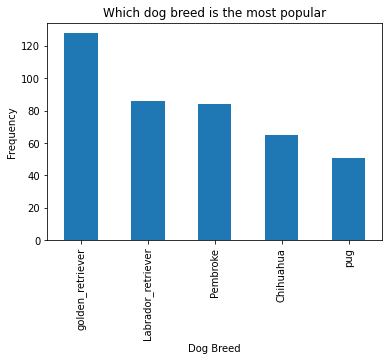

In [112]:
df_clean.predicted_dog_breed.value_counts().head(5).plot(kind="bar")
plt.xlabel('Dog Breed')
plt.ylabel('Frequency')
## FIX: Adding a title to the plot
plt.title('Which dog breed is the most popular')
plt.savefig('doog_breed.png');

#### 4.1.2 Top 10 List: Which dog names are popular?


In [113]:
df_clean.dog_name.value_counts().head(10)

Charlie    11
Cooper     10
Lucy        9
Oliver      9
Tucker      8
Daisy       7
Winston     7
Sadie       7
Penny       7
Koda        6
Name: dog_name, dtype: int64

#### 4.1.3 Which Tweet hast the most favorite count?

In [114]:
df_clean[df_clean.favorite_count == df_clean.favorite_count.max()]

,tweet_id,timestamp,platform_source,dog_name,dog_stage,number_of_images,predicted_dog_breed,prediction1,confidence_level_prediction1,prediction1_is_dog,prediction2,confidence_level_prediction2,prediction2_is_dog,prediction3,confidence_level_prediction3,prediction3_is_dog,rating_numerator,rating_denominator,favorite_count,retweet_count
862,744234799360020481,2016-06-18 18:26:18,Twitter for IPhone,Tina Conrad,doggo,1.0,Labrador_retriever,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,13.0,10.0,149781.0,73837.0


In [115]:
df_clean[df_clean.favorite_count == df_clean.favorite_count.max()].predicted_dog_breed

862    Labrador_retriever
Name: predicted_dog_breed, dtype: category
Categories (109, object): ['Afghan_hound', 'Airedale', 'American_Staffordshire_terrier', 'Appenzeller', ..., 'toy_terrier', 'vizsla', 'whippet', 'wire-haired_fox_terrier']

#### 4.1.4 Which is the most used distribution platform?

In [116]:
df_clean.platform_source.value_counts()

Twitter for IPhone    1649
Twitter Web Client      22
TweetDeck                8
Vine                     0
Name: platform_source, dtype: int64

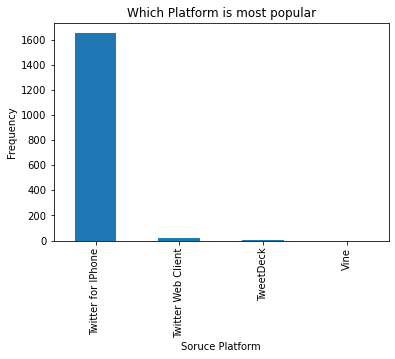

In [117]:
df_clean.platform_source.value_counts().plot(kind="bar")
plt.xlabel('Soruce Platform')
plt.ylabel('Frequency')
plt.title('Which Platform is most popular');

#### 4.1.5 Rating numerator 

''

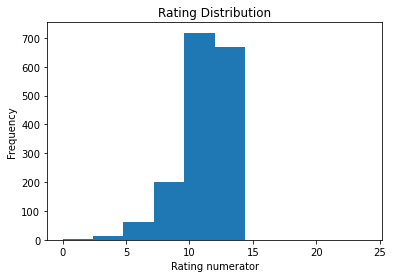

In [127]:
df_clean[df_clean.rating_numerator <= 30.0].rating_numerator.plot(kind="hist")
plt.xlabel('Rating numerator')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
;

In [119]:
df_clean.rating_numerator.value_counts().head(20)

12.00     421
10.00     359
11.00     356
13.00     225
9.00      133
8.00       68
7.00       32
14.00      23
6.00       16
5.00       13
4.00        7
3.00        5
2.00        2
165.00      1
1.00        1
121.00      1
11.26       1
144.00      1
0.00        1
50.00       1
Name: rating_numerator, dtype: int64

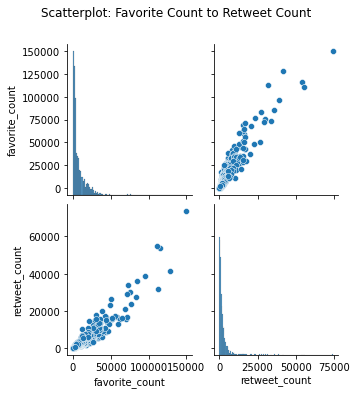

In [120]:
# Creating a scatterplot of Favorite Count to Retweet Count
sns.pairplot(df_clean[["favorite_count", "retweet_count"]])
plt.title('Scatterplot: Favorite Count to Retweet Count', y=2.2, x=-0.3);

### Some other Stuff

In [121]:
df_clean.groupby(["predicted_dog_breed"]).mean()["favorite_count"].sort_values(ascending=False)

predicted_dog_breed
standard_poodle       22819.000000
Saluki                21463.750000
French_bulldog        16805.041667
Eskimo_dog            16300.142857
Afghan_hound          15247.000000
                          ...     
standard_schnauzer     1757.000000
groenendael            1676.000000
Tibetan_terrier        1231.333333
Japanese_spaniel       1160.000000
Brabancon_griffon       718.000000
Name: favorite_count, Length: 109, dtype: float64

In [122]:
df_clean.groupby(["predicted_dog_breed"]).sum()["favorite_count"].sort_values(ascending=False)

predicted_dog_breed
golden_retriever      1434298.0
Labrador_retriever     942401.0
Pembroke               869490.0
Chihuahua              512832.0
Samoyed                412707.0
                        ...    
cairn                    1819.0
standard_schnauzer       1757.0
groenendael              1676.0
Brabancon_griffon        1436.0
Japanese_spaniel         1160.0
Name: favorite_count, Length: 109, dtype: float64

In [123]:
df_clean.groupby(["predicted_dog_breed"]).mean()["rating_numerator"].sort_values(ascending=False)

predicted_dog_breed
soft-coated_wheaten_terrier    27.600000
West_Highland_white_terrier    16.666667
borzoi                         15.375000
Great_Pyrenees                 15.307692
Labrador_retriever             14.174419
                                 ...    
Maltese_dog                     9.250000
dalmatian                       9.000000
Walker_hound                    8.333333
Norwich_terrier                 8.000000
Japanese_spaniel                5.000000
Name: rating_numerator, Length: 109, dtype: float64

In [124]:
df_clean.describe()

,number_of_images,confidence_level_prediction1,confidence_level_prediction2,confidence_level_prediction3,rating_numerator,rating_denominator,favorite_count,retweet_count
count,1679.00000,1679.000000,1679.000000,1.679000e+03,1679.000000,1679.000000,1679.00000,1679.000000
mean,1.21620,0.604458,0.137221,6.150826e-02,11.418571,10.536629,8266.79869,2379.220965
std,0.57693,0.266429,0.101123,5.191014e-02,7.955433,6.960278,12167.27751,4326.190503
min,1.00000,0.044333,0.000010,2.160900e-07,0.000000,2.000000,69.00000,11.000000
25%,1.00000,0.377784,0.055020,1.608055e-02,10.000000,10.000000,1867.00000,536.500000
50%,1.00000,0.605851,0.121488,5.000780e-02,11.000000,10.000000,3806.00000,1186.000000
75%,1.00000,0.849540,0.198406,9.474290e-02,12.000000,10.000000,10226.50000,2698.000000
max,4.00000,0.999984,0.467678,2.734190e-01,165.000000,150.000000,149781.00000,73837.000000


In [125]:
df_clean.timestamp.min()

Timestamp('2015-11-15 22:32:08')

In [126]:
df_clean.timestamp.max()

Timestamp('2017-08-01 00:17:27')